In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/dccstor/ipc1/CAR/DREAM/DREAMdata/Time_aligned_per_cell_line/CL_incl_test/BT20.csv")
non_marker_cols =  ["treatment", "cell_line", "time"]
markers = [c for c in data.columns if c not in non_marker_cols]

KeyboardInterrupt: 

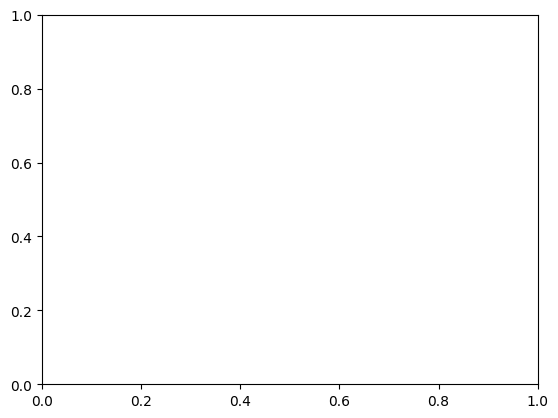

In [90]:
for m in markers:
    sns.lineplot(data=data, x=m, y="time", hue="treatment")
    plt.title(m)
    plt.show()

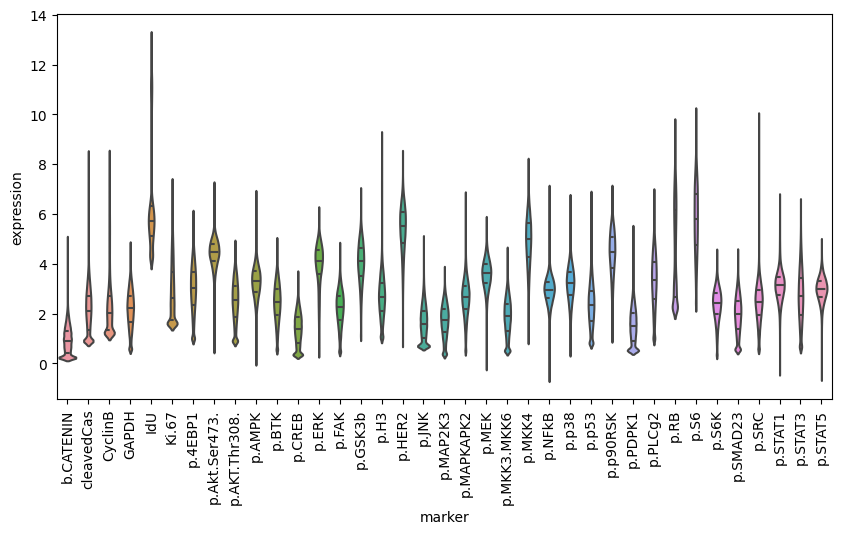

In [23]:
plt_data = data[data["time"]==9].melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

# MinMax scaling

In [29]:
mm_scaler = MinMaxScaler()
mm_norm = pd.DataFrame(mm_scaler.fit_transform(data.loc[data["time"]==9, markers]), columns=markers)
mm_norm[non_marker_cols] = data.loc[data["time"]==9, non_marker_cols].reset_index(drop=True)

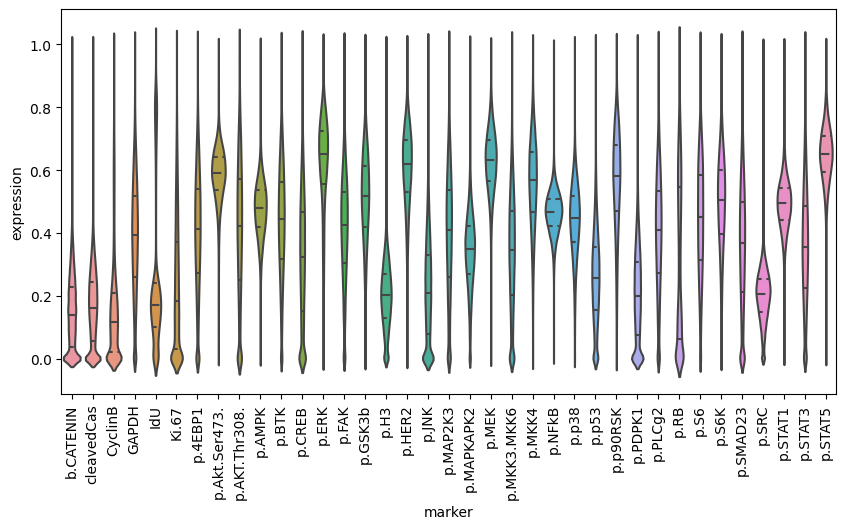

In [31]:
plt_data = mm_norm.melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

# Standard scaling

In [32]:
std_scaler = StandardScaler()
std_norm = pd.DataFrame(std_scaler.fit_transform(data.loc[data["time"]==9, markers]), columns=markers)
std_norm[non_marker_cols] = data.loc[data["time"]==9, non_marker_cols].reset_index(drop=True)

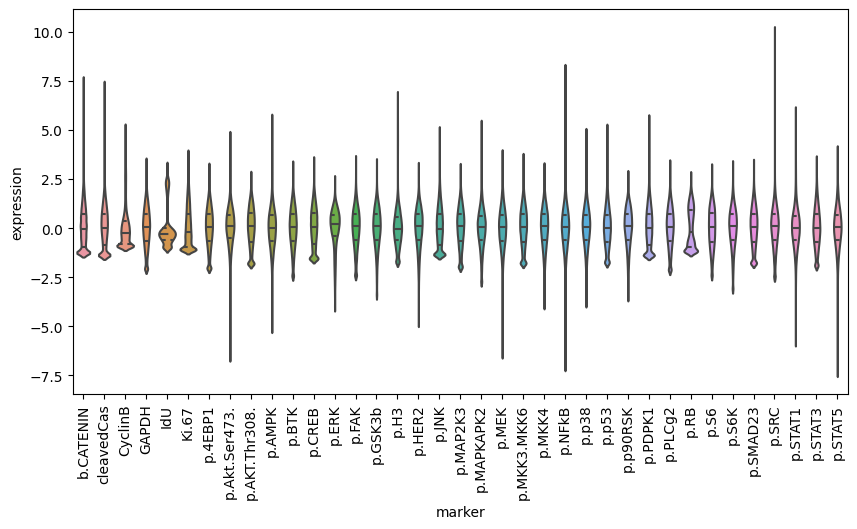

In [33]:
plt_data = std_norm.melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

# Quantile normalisation

In [34]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0) 
                             columns=df.columns), 
                             index=df.index,
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [88]:
q_scaler = QuantileTransformer(output_distribution="uniform")
q2_norm = pd.DataFrame(q_scaler.fit_transform(data.loc[data["time"]==9, markers]), columns=markers)
q2_norm[non_marker_cols] = data.loc[data["time"]==9, non_marker_cols].reset_index(drop=True)

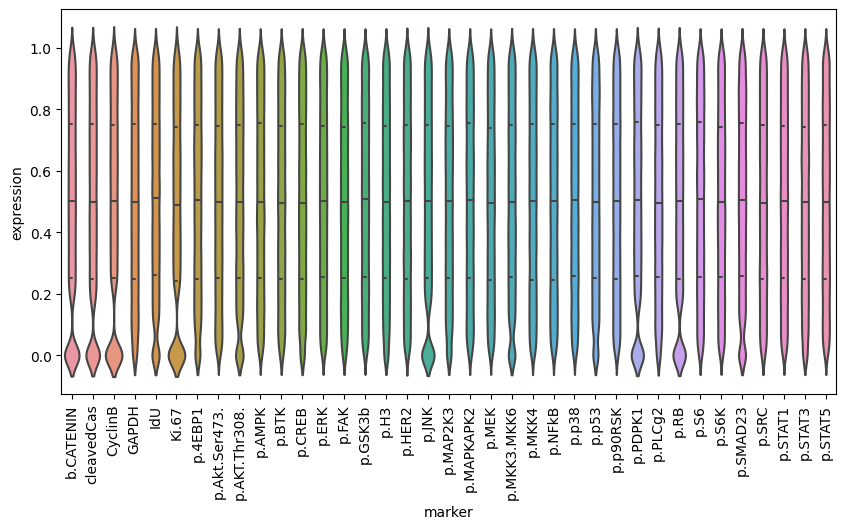

In [89]:
plt_data = q2_norm.melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

In [94]:
pd.DataFrame(q_scaler.quantiles_, columns=q_scaler.feature_names_in_)

,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,0.224784,0.898342,1.204890,0.565534,4.250200,1.590850,0.993163,0.550685,0.895138,0.066427,...,0.516309,0.986227,2.207940,2.396320,0.331558,0.551474,0.554053,-0.341181,0.652426,-0.577393
1,0.224784,0.898342,1.204890,0.565534,4.250200,1.590850,0.993163,1.350026,0.895138,0.946239,...,0.516309,0.986227,2.207940,2.396320,0.331558,0.551474,0.554053,0.900984,0.652426,1.078806
2,0.224784,0.898342,1.204890,0.565534,4.250200,1.590850,0.993163,1.645713,0.895138,1.165310,...,0.516309,0.986227,2.207940,2.396320,0.331558,0.551474,0.554053,1.058995,0.652426,1.269356
3,0.224784,0.898342,1.204890,0.565534,4.250200,1.590850,0.993163,1.873674,0.895138,1.323131,...,0.516309,0.986227,2.207940,2.396320,0.331558,0.551474,0.554053,1.159175,0.652426,1.362320
4,0.224784,0.898342,1.204890,0.565534,4.250200,1.590850,0.993163,2.044899,0.895138,1.419512,...,0.516309,0.986227,2.207940,2.396320,0.331558,0.551474,0.554053,1.204621,0.652426,1.469142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.291050,4.155716,6.599975,3.887521,11.857781,5.960085,5.001088,5.631967,4.265357,5.346280,...,3.242928,5.693502,8.443295,8.567009,3.751081,3.584400,4.075215,4.973477,5.316884,4.182819
996,2.309468,4.217606,6.734778,3.939220,11.901215,6.045327,5.072340,5.658176,4.297789,5.404364,...,3.314015,5.750314,8.509720,8.633113,3.797241,3.624017,4.130917,5.105024,5.404519,4.237350
997,2.343500,4.349468,6.891245,3.975304,11.952807,6.098656,5.135056,5.735380,4.337242,5.551676,...,3.413549,5.841736,8.616598,8.696961,3.888499,3.667278,4.179310,5.193834,5.528724,4.278554
998,2.397489,5.670270,7.011943,4.038729,12.049926,6.249472,5.245517,5.844749,4.394009,5.702492,...,3.590500,6.014741,8.784327,8.881497,3.970178,3.787658,4.324978,5.487906,5.672028,4.431828


In [113]:
q_scaler.references_

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [106]:
pd.DataFrame(np.array([[i for i in range(37)], [1]*37]), columns=q_scaler.feature_names_in_)

,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [110]:
pd.DataFrame(q_scaler.transform(np.array([[i for i in range(37)], [1]*37])), columns = q_scaler.feature_names_in_)

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,0.000000,0.179194,0.490243,0.868275,0.0,0.944012,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.575191,0.179194,0.000000,0.081328,0.0,0.000000,0.05682,0.000563,0.098212,0.001247,...,0.298785,0.036548,0.0,0.0,0.037317,0.152416,0.043969,0.001628,0.066433,0.000953


In [39]:
q_norm = quantile_normalize(data.loc[data["time"]==9, markers])
q_norm[non_marker_cols] = data.loc[data["time"]==9, non_marker_cols]

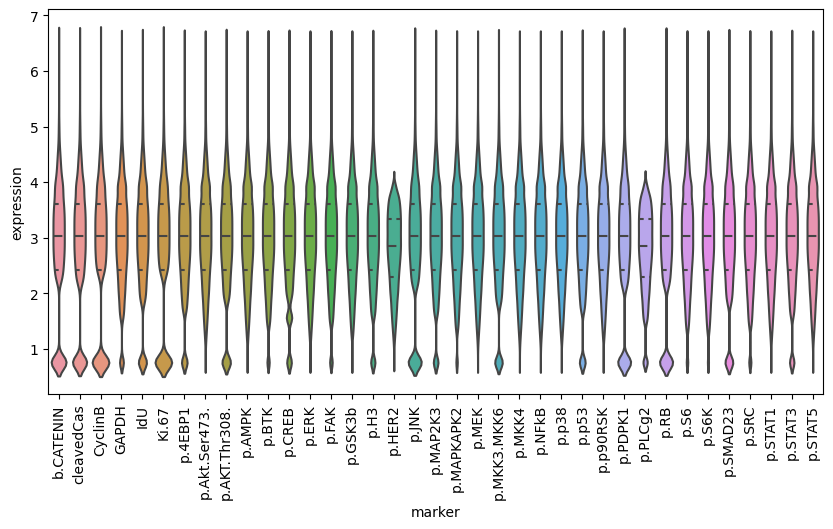

In [41]:
plt_data = q_norm.melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

# Value clipping

In [72]:
q_high = data.loc[data["time"]==9, markers].quantile(0.9)
q_low = data.loc[data["time"]==9, markers].quantile(0.1)


In [80]:
clip_norm = data.loc[data["time"]==9, markers][data.loc[data["time"]==9, markers].lt(q_high, axis=1) ]
clip_norm = temp1.fillna(temp1.max())
clip_norm = temp1[temp1.gt(q_low, axis=1)]
clip_norm = temp1.fillna(temp1.min())
clip_norm[non_marker_cols] = data.loc[data["time"]==9, non_marker_cols]
clip_norm

,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,...,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,treatment,cell_line,time
39930,1.224304,3.213135,1.67609,2.483102,5.07067,4.07631,2.978227,3.725958,2.156774,2.825478,...,5.19125,2.829484,2.736048,2.444440,2.787156,3.795150,2.914480,EGF,BT20,9.0
39931,1.570814,3.104945,2.84415,3.132516,5.17307,2.61672,4.169547,4.832461,1.396088,3.703015,...,7.07932,3.118382,2.895286,3.320561,3.756899,3.337537,3.423541,EGF,BT20,9.0
39932,1.659407,2.391533,2.04206,3.055240,8.53037,3.08732,4.169547,4.950555,2.922023,4.007719,...,7.49839,2.685063,2.895286,2.359190,3.812848,4.092608,3.202958,EGF,BT20,9.0
39933,1.592938,3.167000,3.32220,2.908168,5.52778,4.56526,4.169547,4.307085,3.544752,4.027027,...,6.30066,2.947186,2.439946,3.320561,3.769531,4.092608,3.083133,EGF,BT20,9.0
39934,0.993266,1.621854,1.89473,1.302664,4.91474,2.94402,2.302186,4.799963,2.743714,2.944748,...,6.76279,2.822678,2.516886,1.793988,3.330748,2.913900,2.964230,EGF,BT20,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452417,1.160053,2.604917,2.00772,2.692249,10.63255,3.17277,3.969776,4.750382,1.958181,3.183198,...,6.36103,2.900273,2.686852,1.889330,3.067413,2.794047,3.000972,imTOR,BT20,9.0
452418,1.419387,2.593217,2.41050,2.990656,5.27719,2.85022,4.169547,4.680213,3.540133,4.027027,...,6.66716,2.802130,2.895286,3.165822,3.812848,3.812983,3.455148,imTOR,BT20,9.0
452419,1.337761,2.624505,1.93611,1.952231,5.65511,2.46178,2.998020,4.673769,3.013180,3.827006,...,4.89142,2.241710,0.718042,3.002410,3.574916,4.092608,3.524628,imTOR,BT20,9.0
452420,0.719871,2.281024,1.20492,2.506956,5.29622,1.59092,2.544454,3.894409,3.177926,2.489259,...,4.91044,2.014520,1.879691,1.940347,2.388848,2.948332,3.180962,imTOR,BT20,9.0


In [76]:
data[data["time"]==9]

,treatment,cell_line,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
39930,EGF,BT20,9.0,1.224304,3.213135,1.67609,2.483102,5.07067,4.07631,2.978227,...,1.985751,1.696969,3.04759,5.19125,2.829484,2.736048,2.444440,2.787156,3.795150,2.914480
39931,EGF,BT20,9.0,1.570814,3.104945,2.84415,3.506001,5.17307,2.61672,4.419193,...,2.855207,4.744037,3.50412,7.07932,3.313660,2.907493,3.377821,3.756899,3.337537,3.423541
39932,EGF,BT20,9.0,1.659957,2.391533,2.04206,3.055240,8.53037,3.08732,4.346089,...,2.630216,4.693868,7.21985,7.99214,2.685063,3.353632,2.359190,3.814279,4.106137,3.202958
39933,EGF,BT20,9.0,1.592938,3.167000,3.32220,2.908168,5.52778,5.69916,4.278666,...,2.000395,4.612609,4.72697,6.30066,2.947186,2.439946,3.447548,3.769531,4.221353,3.083133
39934,EGF,BT20,9.0,0.993266,1.621854,1.89473,1.302664,4.91474,2.94402,2.302186,...,1.173846,3.211994,3.47161,6.76279,2.822678,2.516886,1.793988,3.330748,2.913900,2.964230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452417,imTOR,BT20,9.0,1.160053,2.604917,2.00772,2.692249,11.48868,3.17277,3.969776,...,1.006748,NaN,6.93504,6.36103,2.900273,2.686852,1.889330,3.067413,2.794047,3.000972
452418,imTOR,BT20,9.0,1.419387,2.593217,2.41050,2.990656,5.27719,2.85022,4.500912,...,1.883099,NaN,6.74222,6.66716,2.802130,3.334985,3.165822,3.825881,3.812983,3.455148
452419,imTOR,BT20,9.0,1.337761,2.624505,1.93611,1.952231,5.65511,2.46178,2.998020,...,1.596332,NaN,3.52332,4.89142,2.241710,0.551474,3.002410,3.574916,4.219929,3.524628
452420,imTOR,BT20,9.0,0.719871,2.281024,1.20489,2.506956,5.29622,1.59085,2.544454,...,0.762248,NaN,3.38019,4.91044,2.014520,1.879691,1.940347,2.042907,2.948332,3.180962


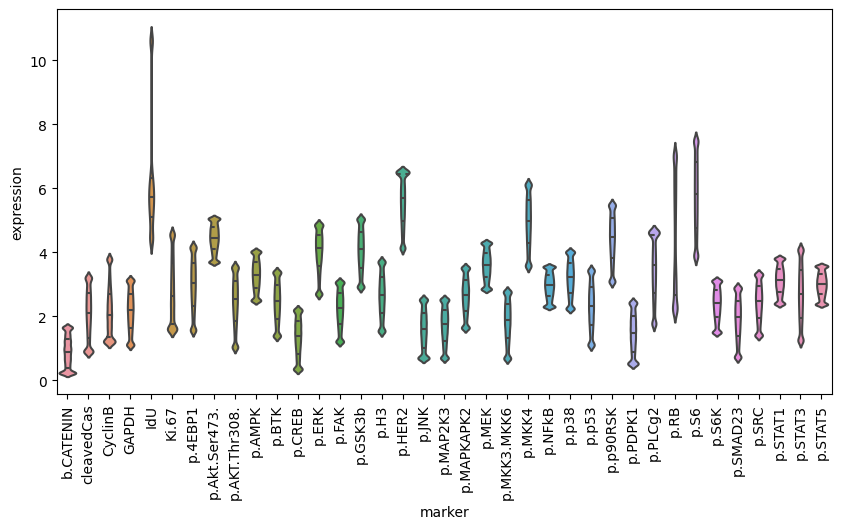

In [81]:
plt_data = clip_norm.melt(id_vars = non_marker_cols, var_name="marker", value_name="expression")

plt.figure(figsize=(10,5))
sns.violinplot(data=plt_data, x="marker", y="expression", inner="quart")
t = plt.xticks(rotation=90)

In [116]:
data

,treatment,cell_line,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,EGF,BT20,0.0,1.473732,3.442083,1.53231,3.154426,4.25020,3.90564,3.913590,...,1.933920,3.557209,3.53145,4.46999,2.019960,2.416691,3.938022,3.128716,2.849716,2.469874
1,EGF,BT20,0.0,1.711831,2.508931,1.20489,2.798322,5.46877,5.34963,3.659888,...,1.685958,3.373101,2.70542,5.04671,2.741856,2.169223,3.275558,2.822612,1.347548,2.795694
2,EGF,BT20,0.0,1.491148,1.978159,2.61173,3.190067,4.86440,5.11698,3.365604,...,0.859948,1.492517,5.25069,6.34630,1.530206,2.406163,1.790347,3.593621,1.886075,2.460457
3,EGF,BT20,0.0,1.250936,2.395486,2.14984,1.170383,5.06905,1.59085,1.995256,...,0.516309,0.986227,4.89048,3.05252,2.442806,3.053240,0.799536,1.736163,3.207189,1.774129
4,EGF,BT20,0.0,1.498227,4.024200,3.28279,3.432561,6.24600,2.28400,3.565958,...,2.179873,4.171272,6.53057,7.41896,3.626556,3.356824,3.375600,2.977972,2.687300,2.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493504,imTOR,BT20,60.0,0.966919,1.946642,1.88225,1.921896,5.41994,3.88962,3.365976,...,0.516309,NaN,2.20794,6.27395,2.421811,2.092576,2.855092,3.021285,2.378153,3.052712
493505,imTOR,BT20,60.0,1.073298,2.952079,2.27942,3.132582,5.42247,1.84408,4.177435,...,2.606164,NaN,2.64547,6.27617,3.517711,3.109025,3.311522,3.681254,2.883952,3.074245
493506,imTOR,BT20,60.0,1.514485,2.636325,2.18677,3.043425,4.67338,3.87238,2.438118,...,1.746247,NaN,3.10143,5.55919,2.829209,2.086540,2.381172,4.013517,1.682455,2.343138
493507,imTOR,BT20,60.0,0.999154,2.108759,2.43561,2.553917,5.87659,2.43821,3.519656,...,1.583819,NaN,2.20794,6.07878,2.879332,1.639487,2.665223,3.204416,2.553642,2.091807
